<h4> Projet image N°1:</h4>
<h3 >
<strong>Amélioration couleur</strong>
</h3>
<h4> A new algorithm for unsupervised global and local
color correction </h4>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'r(x)')

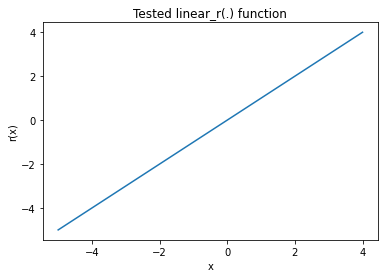

In [ ]:
def linear_r(x):
  return x
plt.plot(np.arange(-5,5),linear_r(np.arange(-5,5)))
plt.title("Tested linear_r(.) function")
plt.xlabel("x")
plt.ylabel("r(x)")

Text(0, 0.5, 'r(x)')

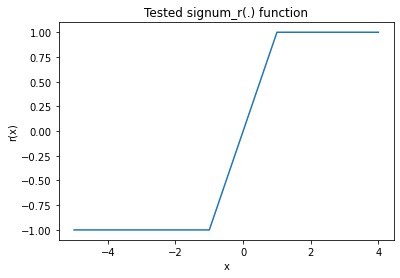

In [ ]:
def signum_r(x):
  return np.sign(x)
plt.plot(np.arange(-5,5),signum_r(np.arange(-5,5)))
plt.title("Tested signum_r(.) function")
plt.xlabel("x")
plt.ylabel("r(x)")

Text(0, 0.5, 'r(x)')

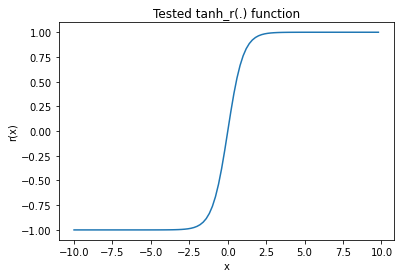

In [ ]:
def tanh_r(x):
  return np.tanh(x)
plt.plot(np.arange(-10,10,0.2),tanh_r(np.arange(-10,10,0.2)))
plt.title("Tested tanh_r(.) function")
plt.xlabel("x")
plt.ylabel("r(x)")

In [ ]:
#better implementation
def saturation_r(x, a):
  assert a>=1
  return np.minimum(1.0, np.maximum(x/a, -1.0))

In [ ]:
saturation_r(2,4)

0.5

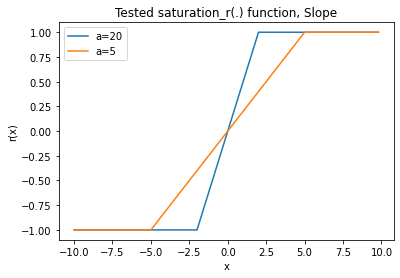

In [ ]:
plt.plot(np.arange(-10,10,0.2),saturation_r(np.arange(-10,10,0.2),2), label="a=20")
plt.plot(np.arange(-10,10,0.2),saturation_r(np.arange(-10,10,0.2),5), label="a=5")
plt.title("Tested saturation_r(.) function, Slope")
plt.xlabel("x")
plt.ylabel("r(x)")
plt.legend(loc="upper left")

In [ ]:
def r(x, a=5, nom_r="tanh"):
  if nom_r=="linear":
    return linear_r(x)
  elif nom_r=="signum":
    return signum_r(x)
  elif nom_r=="tanh":
    return tanh_r(x)
  elif nom_r=="saturation":
    try:
      return saturation_r(x, a)
    except:
      raise Exception("insert the slope of saturation function")

In [ ]:
import matplotlib.image as img

In [ ]:
def Euclidian_distance(dx,dy):
  return np.sqrt(dx**2+dy**2)
def inverse_exp(dx,dy,alpha):
  return(1/np.exp(-alpha*Euclidian_distance(dx,dy)))
def manhattan(dx,dy):
  return dx+dy

def d(dx,dy,distance):
  if distance=='Euclidian':
    return Euclidian_distance(dx,dy)
  elif distance=='inverse exp':
    return inverse_exp(dx,dy)
  elif distance=='manhattan':
    return manhattan(dx,dy)
  elif distance=='maximum':
    return max(dx,dy)
  else:
    print("give a name in (Euclidian, inverse exp, manhattan, maximum")

In [ ]:
!pip install scipy
import scipy
from scipy.optimize import minimize, rosen, rosen_der
def rmax(nom_r):
  max_x = scipy.optimize.fmin(lambda x: -r(x,nom_r), 0)
  return r(max_x[0], nom_r)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def rescale(img):
  return np.interp(img, (img.min(), img.max()), (0, +1))

In [ ]:
def Rc_pixel(p, k, distance, file_name, rm, nom_r='tanh'):
  a,b= p[0] , p[1]
  Ic = plt.imread(file_name)
  c=0
  s=0
  I = rescale(Ic[:,:,k])
  n, m = img.shape[0], img.shape[1]
  for i in range(n):
    for j in range(m):
      try:
        if i!=a or j!=b:
          dx= abs(a-i)
          dy= abs(b-j)
          c+= r(I[a][b]-I[i][j], nom_r)/d(dx, dy, distance)
          s+=rm/d(dx,dy,distance)
      except:
        pass
  return c/s

In [ ]:
def Rc_all (file_name, distance, nom_r='tanh'):
  print(nom_r)
  Ic= plt.imread(file_name,1)
  rm=rmax(nom_r)
  Rc=np.zeros((Ic.shape[0],Ic.shape[1],Ic.shape[2]))
  for k in range(3):
    print("k=",k)
    for i in range (Ic.shape[0]):
      for j in range(Ic.shape[1]):
        Rc[i][j][k]= Rc_pixel([i,j],k, distance, file_name,rm, nom_r)
  return(Rc)

#Subset

In [ ]:
def Rc_pixel_subset(p,k,n, distance ,file_name, rm,nom_r='tanh'):
  a,b= p[0] , p[1]
  Ic = plt.imread(file_name)
  c=0
  s=0
  I = rescale(Ic[:,:,k])
  for i in range(a-n, a+n+1):
    for j in range(b-n, b+n+1):
      try:
        if i!=a or j!=b:
          dx= abs(a-i)
          dy= abs(b-j)
          c+= r(I[a][b]-I[i][j],nom_r)/d(dx,dy,distance)
          s+=rm/d(dx,dy,distance)
      except:
        pass
  return c/s

In [ ]:
def Rc_all_subset (n,file_name, distance, nom_r='tanh'):
  print(nom_r)
  Ic= plt.imread(file_name,1)
  rm=rmax(nom_r)
  Rc=np.zeros((Ic.shape[0],Ic.shape[1],Ic.shape[2]))
  for k in range(3):
    for i in range (Ic.shape[0]):
      for j in range(Ic.shape[1]):
        Rc[i][j][k]= Rc_pixel_subset([i,j],k,n, distance, file_name,rm, nom_r)
  return(Rc)

tanh
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84


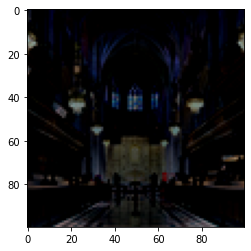

In [ ]:
Rc= Rc_all_subset(20, '/content/cathedral.png', 'Euclidian')
plt.imshow(Rc)

In [ ]:
def sc(mc, Mc):
  assert Mc!=mc
  slope = 255/(Mc-mc)
  return slope

def linear_scaling_pixel(Rc,p,k,sc,mc):
  i,j= p[0],p[1]
  return round(sc*(Rc[i][j][k]-mc))

def linear_scaling(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=linear_scaling_pixel(Rc,[i,j],c,slope,mc)
  return(Oc)

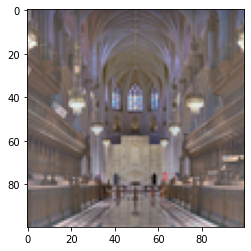

In [ ]:
Oc = linear_scaling(Rc).astype('int32')
plt.imshow(Oc)

In [ ]:
def whitegrayworld_pixel(Rc,p,k,sc):
  i,j=p[0],p[1]
  return round(127.5+sc*Rc[i][j][k])

def whitegrayworld(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=whitegrayworld_pixel(Rc,[i,j],c,slope)
  return(Oc)

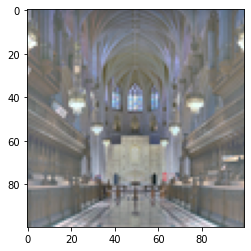

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

In [ ]:
np.save('cathedral_Euc_tanh_Rc', Rc)

saturation
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84


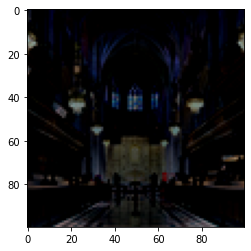

In [ ]:
Rc= Rc_all_subset(20, '/content/cathedral.png', 'Euclidian','saturation')
plt.imshow(Rc)

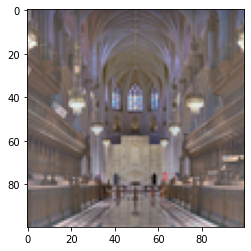

In [ ]:
Oc = linear_scaling(Rc).astype('int32')
plt.imshow(Oc)

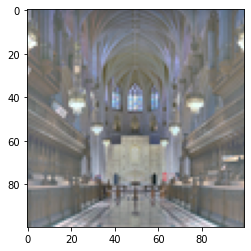

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

In [ ]:
np.save('cathedral_Euc_saturation_Rc', Rc)

#Choosing best sliding-window size

In [ ]:
def Window_Rc_pixel(p, distance, file_name, rm, nom_r='tanh'):
  a,b= p[0] , p[1]
  Ic = plt.imread(file_name)
  I = rescale(Ic[:,:,0])
  dct = dict()
  for n in range(5,I.shape[0],5):
    for m in range(5,I.shape[1],5):
      c=0
      s=0
      for i in range(n):
        for j in range(m):
          if i!=a or j!=b:
            dx= abs(a-i)
            dy= abs(b-j)
            c+= r(I[a][b]-I[i][j], nom_r)/d(dx, dy, distance)
            s+=rm/d(dx,dy,distance)
      dct[(n,m)] = c/s
  return dct

In [ ]:
file_name = '/content/cathedral.png'
Ic= plt.imread(file_name,1)
rm = 1 #rm = rmax('tanh')
i = 0
j = 0
d = Window_Rc_pixel([i,j], 'Euclidian', file_name, rm, 'tanh')
d

In [ ]:
def Window_Rc_pixel(p, distance, file_name, rm, nom_r='tanh'):
  a,b= p[0] , p[1]
  Ic = plt.imread(file_name)
  I = rescale(Ic[:,:,0])
  dct = dict()
  for n in range(5,I.shape[0],5):
    for m in range(5,I.shape[1],5):
      c=0
      s=0
      for i in range(n):
        for j in range(m):
          if i!=a or j!=b:
            dx= abs(a-i)
            dy= abs(b-j)
            s+=rm/d(dx,dy,distance)
      dct[(n,m)] = s
  return dct

In [ ]:
file_name = '/content/cathedral.png'
Ic= plt.imread(file_name,1)
rm = 1 #rm = rmax('tanh')
i = 0
j = 0
dct = Window_Rc_pixel([i,j], 'Euclidian', file_name, rm, 'tanh')
dct

{(5, 5): 9.053673558970083, (5, 10): 12.55316222547133, (5, 15): 14.62189630024564, (5, 20): 16.087361633962573, (5, 25): 17.221366616134407, (5, 30): 18.14601828884539, (5, 35): 18.926503526569856, (5, 40): 19.601684747713108, (5, 45): 20.1965849221768, (5, 50): 20.72825874284651, (5, 55): 21.208850005199977, (5, 60): 21.647311394705167, (5, 65): 22.05043223288189, (5, 70): 22.42348339111146, (5, 75): 22.77063860002349, (5, 80): 23.095259139997086, (5, 85): 23.40009182935088, (5, 90): 23.687410173138325, (5, 95): 23.95911718833082, (10, 5): 12.553162225471327, (10, 10): 18.606197446941845, (10, 15): 22.484089275759924, (10, 20): 25.31343450739624, (10, 25): 27.5323457652622, (10, 30): 29.354442966273496, (10, 35): 30.898842179836095, (10, 40): 32.23839003517505, (10, 45): 33.42075303961273, (10, 50): 34.47877148209139, (10, 55): 35.43600717322556, (10, 60): 36.309926557127326, (10, 65): 37.113830394127554, (10, 70): 37.858077655617734, (10, 75): 38.550891641940986, (10, 80): 39.198908

{(5, 5): 9.053673558970083,
 (5, 10): 12.55316222547133,
 (5, 15): 14.62189630024564,
 (5, 20): 16.087361633962573,
 (5, 25): 17.221366616134407,
 (5, 30): 18.14601828884539,
 (5, 35): 18.926503526569856,
 (5, 40): 19.601684747713108,
 (5, 45): 20.1965849221768,
 (5, 50): 20.72825874284651,
 (5, 55): 21.208850005199977,
 (5, 60): 21.647311394705167,
 (5, 65): 22.05043223288189,
 (5, 70): 22.42348339111146,
 (5, 75): 22.77063860002349,
 (5, 80): 23.095259139997086,
 (5, 85): 23.40009182935088,
 (5, 90): 23.687410173138325,
 (5, 95): 23.95911718833082,
 (10, 5): 12.553162225471327,
 (10, 10): 18.606197446941845,
 (10, 15): 22.484089275759924,
 (10, 20): 25.31343450739624,
 (10, 25): 27.5323457652622,
 (10, 30): 29.354442966273496,
 (10, 35): 30.898842179836095,
 (10, 40): 32.23839003517505,
 (10, 45): 33.42075303961273,
 (10, 50): 34.47877148209139,
 (10, 55): 35.43600717322556,
 (10, 60): 36.309926557127326,
 (10, 65): 37.113830394127554,
 (10, 70): 37.858077655617734,
 (10, 75): 38.550

In [ ]:
rm = rmax('tanh')
rm

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84


1.0

#Inference cathedral

In [ ]:
import matplotlib.pyplot as plt

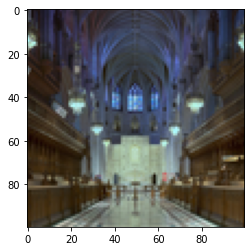

In [ ]:
img = plt.imread('/content/cathedral.png')
plt.imshow(img)

In [ ]:
img.shape

(150, 200, 3)

In [ ]:
img = img[:,:,:3]
img.shape

(150, 200, 3)

In [ ]:
Rc= Rc_all('/content/cathedral.png', 'Euclidian', 'linear')

linear
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84
k= 0
k= 1
k= 2


In [ ]:
np.save('cathedral_Euc_Linear_Rc', Rc)

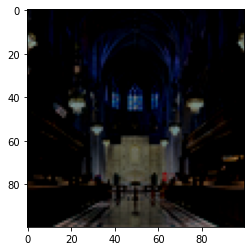

In [ ]:
Rc = Rc[:,:,:3]
plt.imshow(Rc)

In [ ]:
def sc(mc, Mc):
  assert Mc!=mc
  slope = 255/(Mc-mc)
  return slope

In [ ]:
def linear_scaling_pixel(Rc,p,k,sc,mc):
  i,j= p[0],p[1]
  return round(sc*(Rc[i][j][k]-mc))

def linear_scaling(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=linear_scaling_pixel(Rc,[i,j],c,slope,mc)
  return(Oc)

In [ ]:
Oc = linear_scaling(Rc).astype('int32')

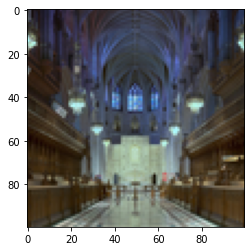

In [ ]:
plt.imshow(img)

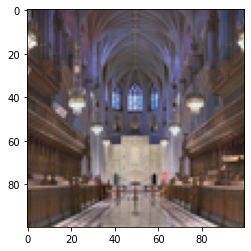

In [ ]:
plt.imshow(Oc)

In [ ]:
def whitegrayworld_pixel(Rc,p,k,sc):
  i,j=p[0],p[1]
  return round(127.5+sc*Rc[i][j][k])

def whitegrayworld(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=whitegrayworld_pixel(Rc,[i,j],c,slope)
  return(Oc)

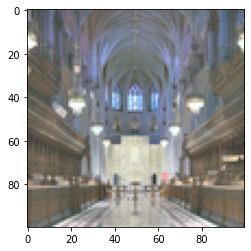

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

#Inference dino

In [ ]:
import matplotlib.pyplot as plt

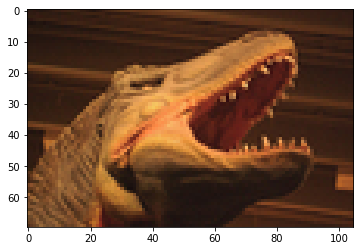

In [ ]:
img = plt.imread('/content/dino.jpg')
plt.imshow(img)

In [ ]:
img.shape

(150, 200, 3)

In [ ]:
img = img[:,:,:3]
img.shape

(150, 200, 3)

In [ ]:
Rc= Rc_all('/content/dino.jpg', 'Euclidian', 'linear')

linear
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84
k= 0
k= 1
k= 2


In [ ]:
np.save('Dino_Euc_Linear_Rc', Rc)

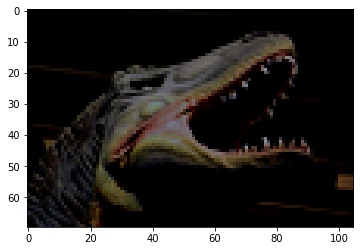

In [ ]:
Rc = Rc[:,:,:3]
plt.imshow(Rc)

In [ ]:
def sc(mc, Mc):
  assert Mc!=mc
  slope = 255/(Mc-mc)
  return slope

In [ ]:
def linear_scaling_pixel(Rc,p,k,sc,mc):
  i,j= p[0],p[1]
  return round(sc*(Rc[i][j][k]-mc))

def linear_scaling(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=linear_scaling_pixel(Rc,[i,j],c,slope,mc)
  return(Oc)

In [ ]:
Oc = linear_scaling(Rc).astype('int32')

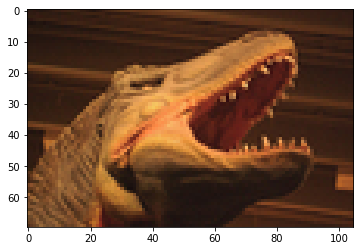

In [ ]:
plt.imshow(img)

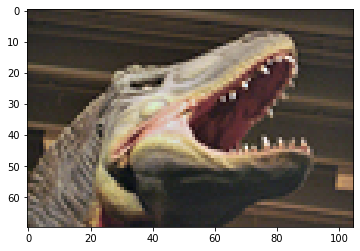

In [ ]:
plt.imshow(Oc)

In [ ]:
def whitegrayworld_pixel(Rc,p,k,sc):
  i,j=p[0],p[1]
  return round(127.5+sc*Rc[i][j][k])

def whitegrayworld(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=whitegrayworld_pixel(Rc,[i,j],c,slope)
  return(Oc)

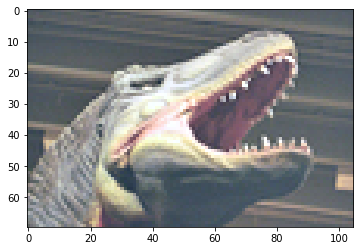

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

#Inference tree

In [ ]:
import matplotlib.pyplot as plt

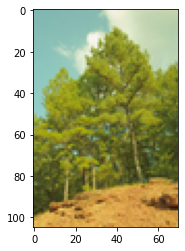

In [ ]:
img = plt.imread('/content/tree.jpg')
plt.imshow(img)

In [ ]:
img.shape

(150, 200, 3)

In [ ]:
img = img[:,:,:3]
img.shape

(150, 200, 3)

In [ ]:
Rc= Rc_all('/content/tree.jpg', 'Euclidian', 'linear')

linear
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84
k= 0
k= 1
k= 2


In [ ]:
np.save('Tree_Euc_Linear_Rc', Rc)

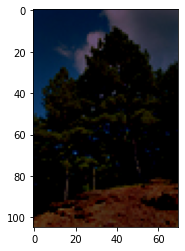

In [ ]:
Rc = Rc[:,:,:3]
plt.imshow(Rc)

In [ ]:
def sc(mc, Mc):
  assert Mc!=mc
  slope = 255/(Mc-mc)
  return slope

In [ ]:
def linear_scaling_pixel(Rc,p,k,sc,mc):
  i,j= p[0],p[1]
  return round(sc*(Rc[i][j][k]-mc))

def linear_scaling(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=linear_scaling_pixel(Rc,[i,j],c,slope,mc)
  return(Oc)

In [ ]:
Oc = linear_scaling(Rc).astype('int32')

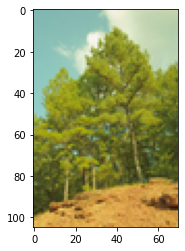

In [ ]:
plt.imshow(img)

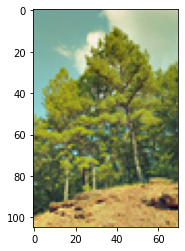

In [ ]:
plt.imshow(Oc)

In [ ]:
def whitegrayworld_pixel(Rc,p,k,sc):
  i,j=p[0],p[1]
  return round(127.5+sc*Rc[i][j][k])

def whitegrayworld(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=whitegrayworld_pixel(Rc,[i,j],c,slope)
  return(Oc)

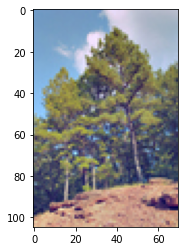

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

#Inference dog

In [ ]:
import matplotlib.pyplot as plt

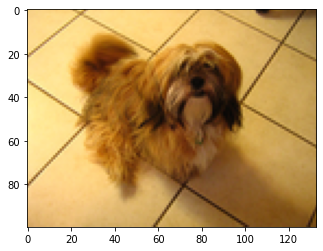

In [ ]:
img = plt.imread('/content/dog.png')
plt.imshow(img)

In [ ]:
img.shape

(150, 200, 3)

In [ ]:
img = img[:,:,:3]
img.shape

(150, 200, 3)

In [ ]:
Rc= Rc_all('/content/dog.png', 'Euclidian', 'linear')

linear
Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 34
         Function evaluations: 84
k= 0
k= 1
k= 2


In [ ]:
np.save('Dog_Euc_Linear_Rc', Rc)

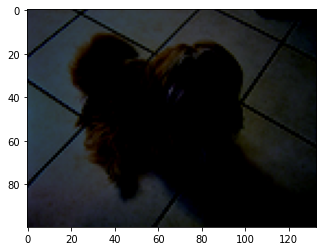

In [ ]:
Rc = Rc[:,:,:3]
plt.imshow(Rc)

In [ ]:
def sc(mc, Mc):
  assert Mc!=mc
  slope = 255/(Mc-mc)
  return slope

In [ ]:
def linear_scaling_pixel(Rc,p,k,sc,mc):
  i,j= p[0],p[1]
  return round(sc*(Rc[i][j][k]-mc))

def linear_scaling(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=linear_scaling_pixel(Rc,[i,j],c,slope,mc)
  return(Oc)

In [ ]:
Oc = linear_scaling(Rc).astype('int32')

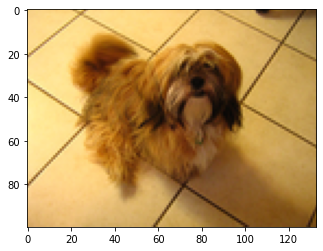

In [ ]:
plt.imshow(img)

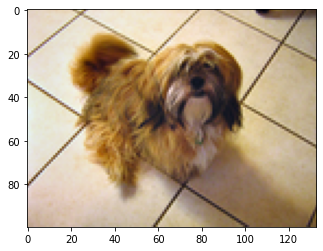

In [ ]:
plt.imshow(Oc)

In [ ]:
def whitegrayworld_pixel(Rc,p,k,sc):
  i,j=p[0],p[1]
  return round(127.5+sc*Rc[i][j][k])

def whitegrayworld(Rc):
  Oc=np.zeros((Rc.shape[0],Rc.shape[1],3))
  for c in range(3):
    mc=Rc[:,:,c].min()
    Mc=Rc[:,:,c].max()
    slope = sc(mc,Mc)
    for i in range(Rc.shape[0]):
      for j in range(Rc.shape[1]):
        Oc[i][j][c]=whitegrayworld_pixel(Rc,[i,j],c,slope)
  return(Oc)

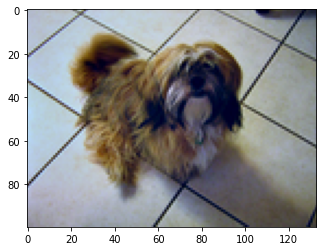

In [ ]:
wgw = whitegrayworld(Rc).astype('int32')
plt.imshow(wgw)

#Histograms

In [ ]:
img.ravel()

array([0.9607843 , 0.8117647 , 0.5294118 , ..., 0.4509804 , 0.28627452,
       0.09803922], dtype=float32)

In [ ]:
histogram, bin_edges = np.histogram(wgw, bins=256, range=(0, 1))

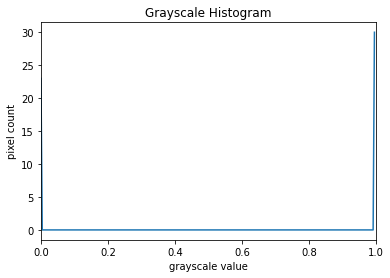

In [ ]:
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixel count")
plt.xlim([0.0, 1.0])  # <- named arguments do not work here

plt.plot(bin_edges[0:-1], histogram)  # <- or here

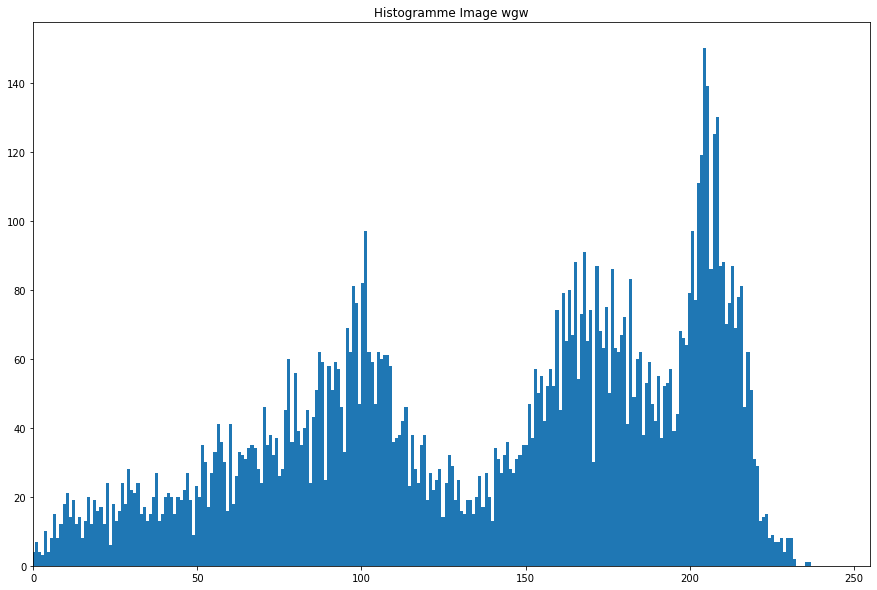

In [ ]:
import matplotlib.pyplot as plt
import cv2


# calculate mean value from RGB channels and flatten to 1D array
vals = wgw.mean(axis=2).flatten()
plt.figure(figsize=(15,10))
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.title("Histogramme Image wgw")
plt.show()

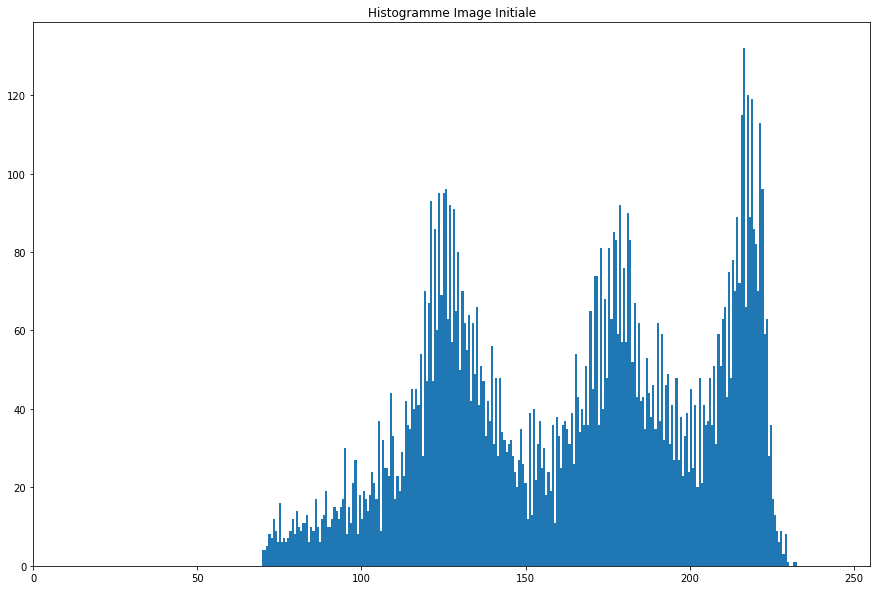

In [ ]:
img2 = plt.imread("/content/doge1.png", 1)
vals = img2.mean(axis=2).flatten()
plt.figure(figsize=(15,10))
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.title("Histogramme Image Initiale")
plt.show()

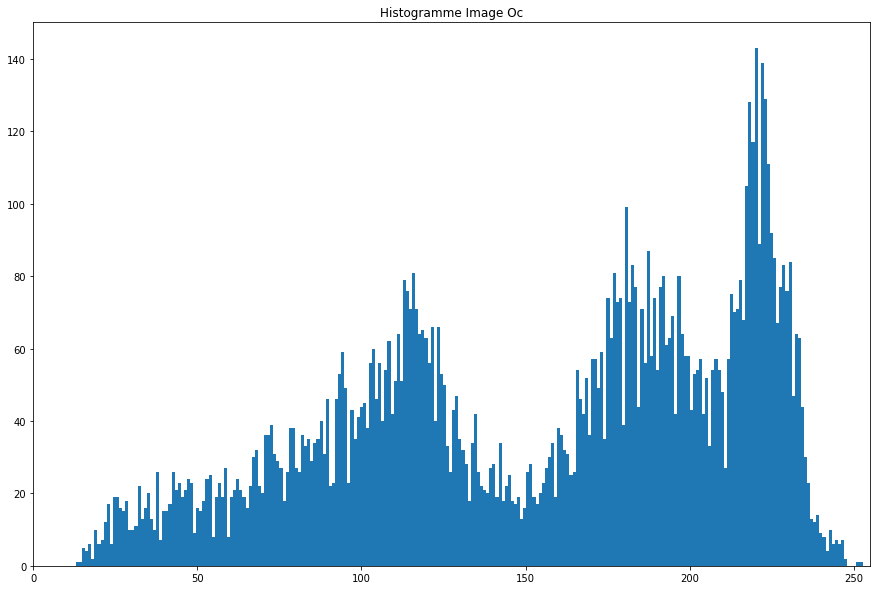

In [ ]:
vals = Oc.mean(axis=2).flatten()
plt.figure(figsize=(15,10))
# plot histogram with 255 bins
b, bins, patches = plt.hist(vals, 255)
plt.xlim([0,255])
plt.title("Histogramme Image Oc")
plt.show()

In [ ]:
def rescale(img):
  return np.interp(img, (img.min(), img.max()), (0, +1))

In [ ]:
img2 = plt.imread("/content/doge1.png", 1)

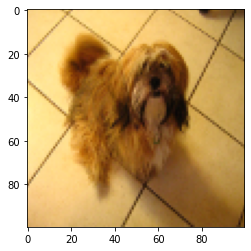

In [ ]:
plt.imshow(img2)